# <p style ="text-align: center">EDA</p>

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import sys

### Data Loading

Let's start by loading the general channel data, as well as their associated time series.

In [3]:
NOTEBOOK_PATH = os.getcwd()
DIR_PATH = os.path.dirname(NOTEBOOK_PATH)
DATA_PATH = os.path.join(DIR_PATH, "data")
UTILS_PATH = os.path.join(DIR_PATH, "utils")

In [4]:
df_channels_en = pd.read_csv(f"{DATA_PATH}/df_channels_en.tsv.gz", compression="infer", sep="\t") 
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t")

In [5]:
df_channels_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136470 entries, 0 to 136469
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         136342 non-null  object 
 1   join_date           136469 non-null  object 
 2   channel             136470 non-null  object 
 3   name_cc             136460 non-null  object 
 4   subscribers_cc      136470 non-null  int64  
 5   videos_cc           136470 non-null  int64  
 6   subscriber_rank_sb  136470 non-null  float64
 7   weights             136470 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.3+ MB


In [15]:
df_channels_en['category_cc'].value_counts()

category_cc
Music                    24285
Entertainment            22951
Gaming                   20143
People & Blogs           18413
Howto & Style            11875
Education                 7803
Film and Animation        6875
Sports                    5148
Science & Technology      4864
Comedy                    3767
Autos & Vehicles          3705
News & Politics           2263
Travel & Events           1989
Pets & Animals            1292
Nonprofits & Activism      969
Name: count, dtype: int64

### People and Blogs exploration

We will start by exploring the people and blogs category, which is one of the most popular category in our dataset. We will first look at the general statistics of the category, and then we will look at its time series evolution.

In [10]:
CATEGORY = "People & Blogs"

In [13]:
df_people_and_blogs = df_channels_en[df_channels_en['category_cc'] == CATEGORY]

In [14]:
df_people_and_blogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18413 entries, 89 to 136469
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_cc         18413 non-null  object 
 1   join_date           18413 non-null  object 
 2   channel             18413 non-null  object 
 3   name_cc             18413 non-null  object 
 4   subscribers_cc      18413 non-null  int64  
 5   videos_cc           18413 non-null  int64  
 6   subscriber_rank_sb  18413 non-null  float64
 7   weights             18413 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.3+ MB


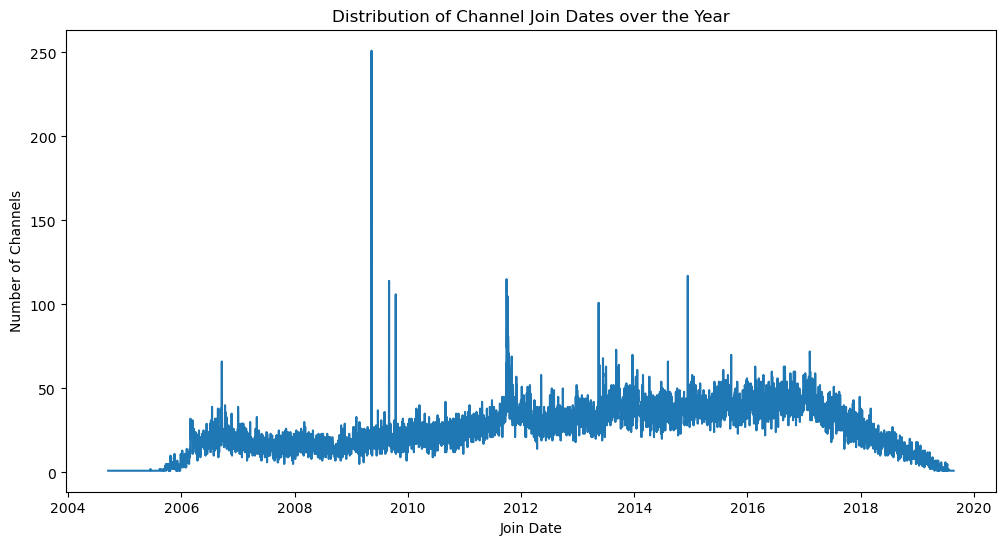

In [17]:
# extract the join date from the dataframe
join_dates = pd.to_datetime(df_channels_en['join_date'])

# count the number of channels that joined on each date
join_dates_counts = join_dates.dt.date.value_counts().sort_index()

# plot the result
plt.figure(figsize=(12,6))
plt.plot(join_dates_counts.index, join_dates_counts.values)
plt.title('Distribution of Channel Join Dates over the Year')
plt.xlabel('Join Date')
plt.ylabel('Number of Channels')
plt.show()
